Exercício 1

<img src = "Questão 1.png" width = "300">

<img src = "Fluxograma 1.png" width = "300">

C:\Users\Admin\AppData\Local\Temp\ipykernel_4024\1624222276.py:29: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
C:\Users\Admin\AppData\Local\Temp\ipykernel_4024\1624222276.py:29: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c


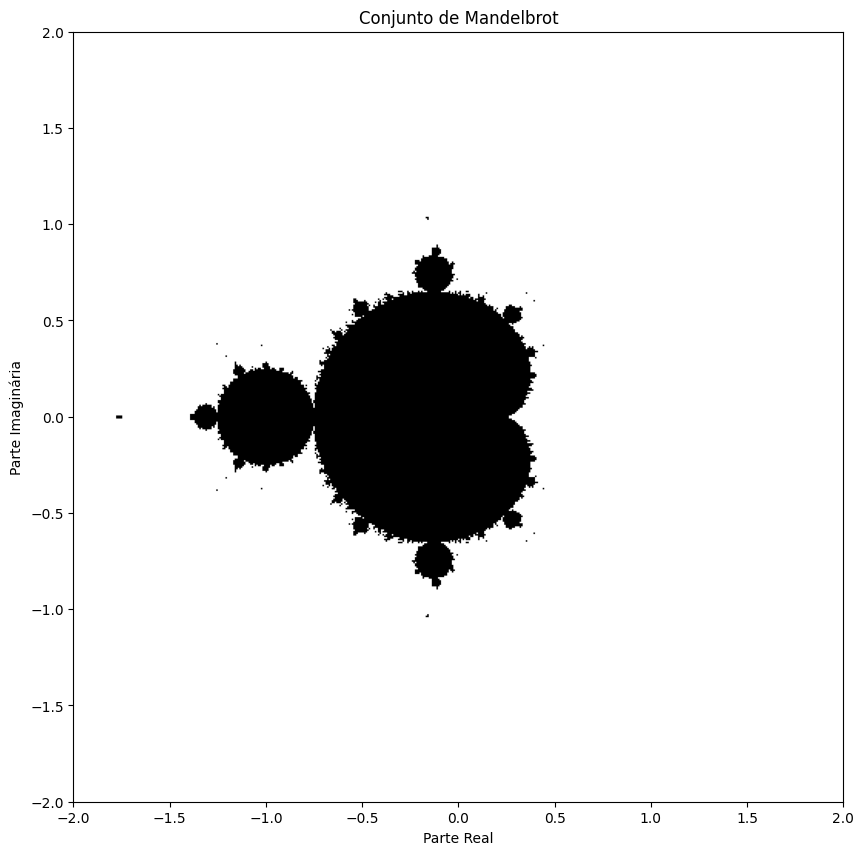

In [1]:
#Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt

#Input da variável N, o tamanho da imagem
N = int(input("Digite o tamanho da imagem (ex: 800):"))

#Input da variável max_iter, que nos dirá o máximo de iterações que serão feitas
max_iter = int(input("Digite o número de iterações (ex: 100):"))

#Aqui criamos os eixos para o nosso futuro plano cartesiano
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)

#Criação do plano cartesiano usando como base os eixos x e y que criamos anteriormente
X, Y = np.meshgrid(x, y)

#Transformando o plano cartesiano em complexo, utilizando as grades X e Y
c = X + 1j * Y

#Inicialização de Z como 0 em todos os pontos do plano c
z = np.zeros_like(c)

#Armazena o número de iterações de cada ponto, começando com o valor máximo
figura_iteracoes = np.full(c.shape, max_iter, dtype=int)

#Aplicação da transformação de Mandelbrot
for i in range(max_iter):
    z = z*z + c
    # A máscara 'escape' encontra os pontos que escaparam nesta iteração
    escape = (abs(z) > 2) & (figura_iteracoes == max_iter)

    # Onde a condição de escape for verdadeira, guardamos o número da iteração 'i'
    figura_iteracoes[escape] = i

#Cria a imagem final em preto e branco. Pontos dentro do conjunto são True, e fora são False.
imagem_preto_e_branco = (figura_iteracoes == max_iter)

#Cria a área onde a figura será desenhada, com um tamanho de 10x10 polegadas
plt.figure(figsize = (10, 10))

#Exibe a imagem em preto e branco
#O mapa de cores 'gray_r' (cinza reverso) colore True como preto e False como branco
plt.imshow(imagem_preto_e_branco, cmap='gray_r', extent=[-2, 2, -2, 2])

#Adiciona um título e rótulos para os eixos
plt.title('Conjunto de Mandelbrot')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')

#Mostra a imagem na tela]
plt.show()

Questão 2

<img src = "Questão 2.png" width = "500">

<img src = "Fluxograma 2.png" width = "200">

Dados de gorjetas carregados. Começando a gerar os gráficos...


C:\Users\Admin\AppData\Local\Temp\ipykernel_6040\2014373621.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_por_dia = df_gorjetas.groupby('day')['total_bill'].mean().reindex(['Thur', 'Fri', 'Sat', 'Sun'])


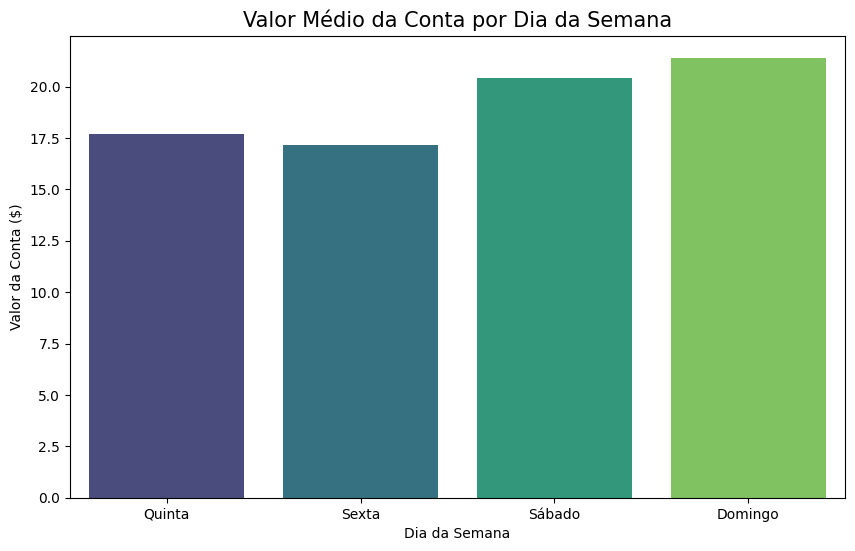

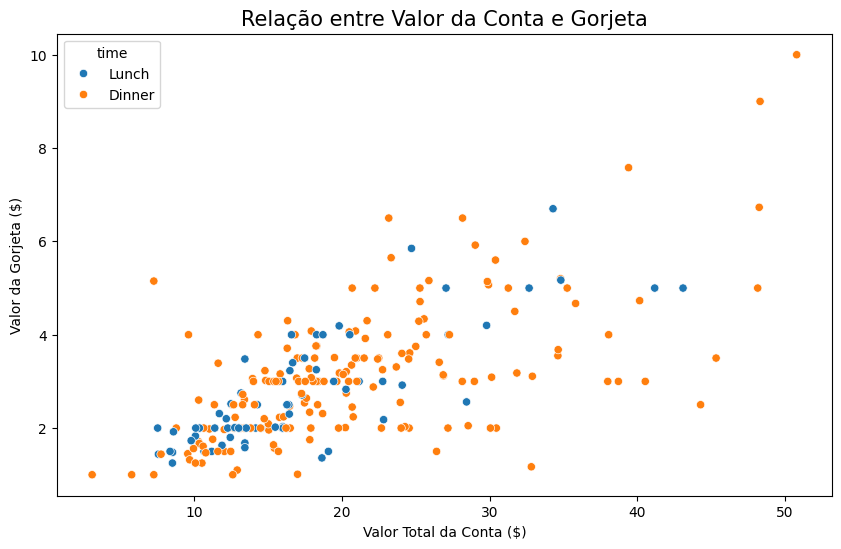

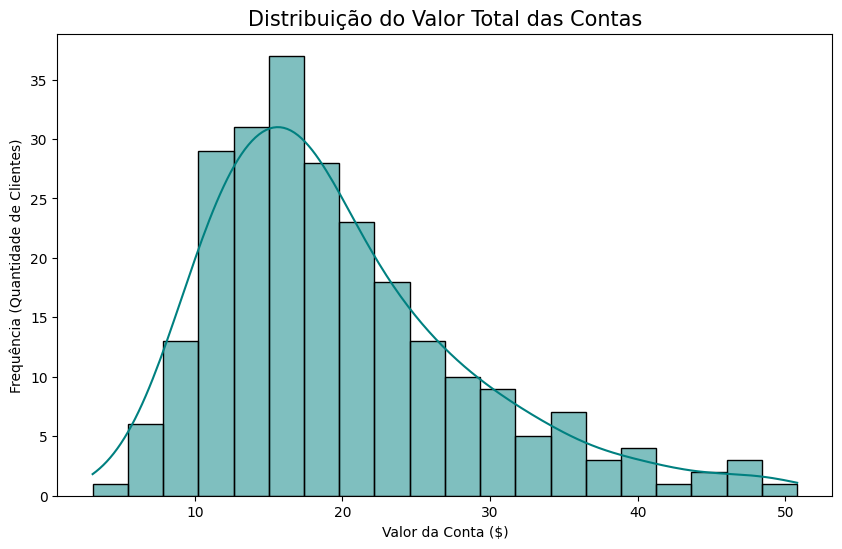

C:\Users\Admin\AppData\Local\Temp\ipykernel_6040\2014373621.py:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gorjeta_media_dia = df_gorjetas.groupby('day')['tip'].mean().reindex(['Thur', 'Fri', 'Sat', 'Sun'])


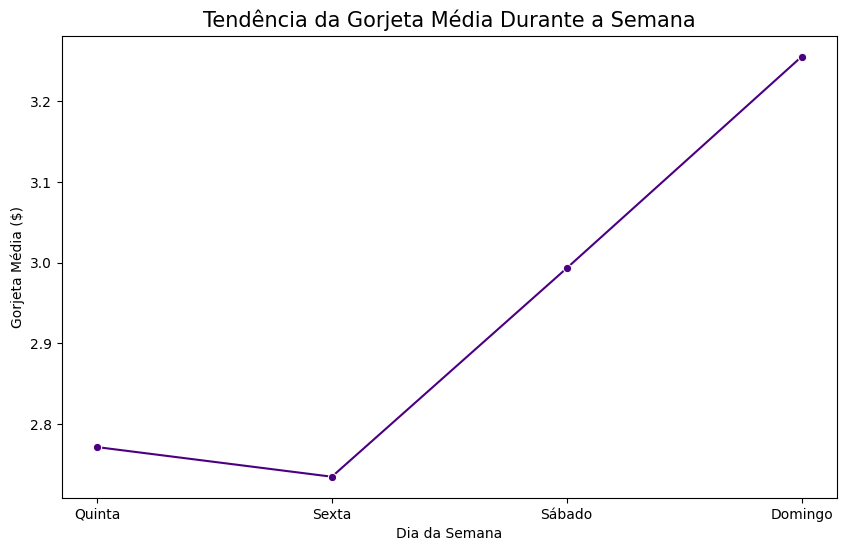

In [6]:


#Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

#Aqui a gente cria uma pasta pra salvar as imagens, se ela já não existir
#Assim o projeto fica mais organizado
pasta_saida = Path('visualizacoes_gorjetas')
pasta_saida.mkdir(exist_ok=True)

#Carrega o conjunto de dados de gorjetas. O Seaborn já tem ele guardado.
df_gorjetas = sns.load_dataset('tips')

print("Dados de gorjetas carregados. Começando a gerar os gráficos...")

# GRÁFICO 1: BARRAS (MÉDIA DA CONTA POR DIA)

#Primeiro, agrupo os dados por dia e calculo a média do 'total_bill'
media_por_dia = df_gorjetas.groupby('day')['total_bill'].mean().reindex(['Thur', 'Fri', 'Sat', 'Sun'])

#Cria a área onde a figura será desenhada
plt.figure(figsize=(10, 6))

#Exibe o gráfico de barras. Uso a média que calculei antes.
sns.barplot(x=media_por_dia.index, y=media_por_dia.values, palette='viridis', hue=media_por_dia.index, dodge=False)

#Adiciona um título e rótulos para os eixos
plt.title('Valor Médio da Conta por Dia da Semana', fontsize=15)
plt.xlabel('Dia da Semana')
plt.ylabel('Valor da Conta ($)')
plt.xticks([0, 1, 2, 3], ['Quinta', 'Sexta', 'Sábado', 'Domingo'])
plt.legend([],[], frameon=False) # Tira a legenda que não precisa

#Salva a imagem na pasta
plt.savefig(pasta_saida / '1_grafico_barras_media_conta.png', dpi=300)

#Mostra a imagem na tela
plt.show()



# GRÁFICO 2: DISPERSÃO (CONTA vs GORJETA)


#Cria a área do gráfico
plt.figure(figsize=(10, 6))

#Desenha o gráfico de dispersão. Cada ponto é um cliente.
#O eixo x é o valor da conta, o y é a gorjeta.
sns.scatterplot(data=df_gorjetas, x='total_bill', y='tip', hue='time')

#Títulos e rótulos
plt.title('Relação entre Valor da Conta e Gorjeta', fontsize=15)
plt.xlabel('Valor Total da Conta ($)')
plt.ylabel('Valor da Gorjeta ($)')

#Salva a imagem
plt.savefig(pasta_saida / '2_grafico_dispersao_conta_vs_gorjeta.png', dpi=300)

#Mostra na tela
plt.show()



# GRÁFICO 3: HISTOGRAMA (DISTRIBUIÇÃO DAS CONTAS)


#Cria a área do gráfico
plt.figure(figsize=(10, 6))

#O histograma mostra quantas contas existem em cada faixa de valor
sns.histplot(data=df_gorjetas, x='total_bill', bins=20, kde=True, color='teal')

#Títulos e rótulos
plt.title('Distribuição do Valor Total das Contas', fontsize=15)
plt.xlabel('Valor da Conta ($)')
plt.ylabel('Frequência (Quantidade de Clientes)')

#Salva a imagem
plt.savefig(pasta_saida / '3_histograma_distribuicao_contas.png', dpi=300)

#Mostra na tela
plt.show()



# GRÁFICO 4: LINHA (TENDÊNCIA DA GORJETA NA SEMANA)


#Calcula a média da gorjeta por dia, igual fizemos com a conta
gorjeta_media_dia = df_gorjetas.groupby('day')['tip'].mean().reindex(['Thur', 'Fri', 'Sat', 'Sun'])

#Cria a área do gráfico
plt.figure(figsize=(10, 6))

#Desenha o gráfico de linha, que é bom pra ver tendência
sns.lineplot(x=gorjeta_media_dia.index, y=gorjeta_media_dia.values, marker='o', color='indigo')

#Títulos e rótulos
plt.title('Tendência da Gorjeta Média Durante a Semana', fontsize=15)
plt.xlabel('Dia da Semana')
plt.ylabel('Gorjeta Média ($)')
plt.xticks([0, 1, 2, 3], ['Quinta', 'Sexta', 'Sábado', 'Domingo'])

#Salva a imagem
plt.savefig(pasta_saida / '4_linha_tendencia_gorjeta.png', dpi=300)

#Mostra na tela
plt.show()


Questão 3: 

<img src = "Questão 3.png" width = 300>

DataFrame de crimes carregado e limpo com sucesso.

Análise focada no ano mais recente disponível: 2022

Gerando Visualização 1: Tendência da Taxa de Homicídios (Brasil vs. Média Global)...


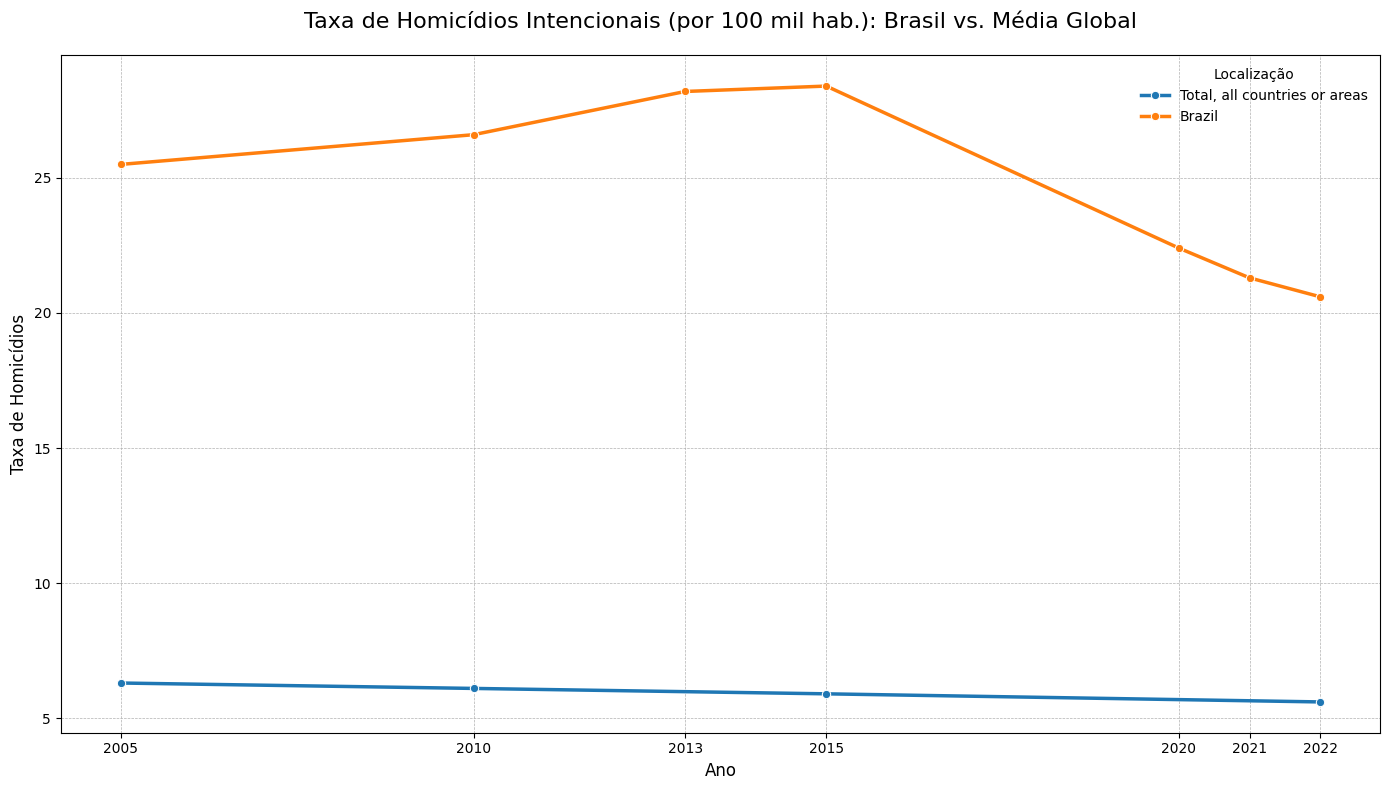

LDC§ not found in regex


Gerando Visualização 2: Mapa Global da Taxa de Homicídios...
Mapa interativo salvo em: visualizacoes_crimes_final\2_mapa_global_homicidios.html
Gerando Visualização 3: Distribuição da Taxa de Homicídios por Continente...


C:\Users\Admin\AppData\Local\Temp\ipykernel_10096\1605472264.py:142: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




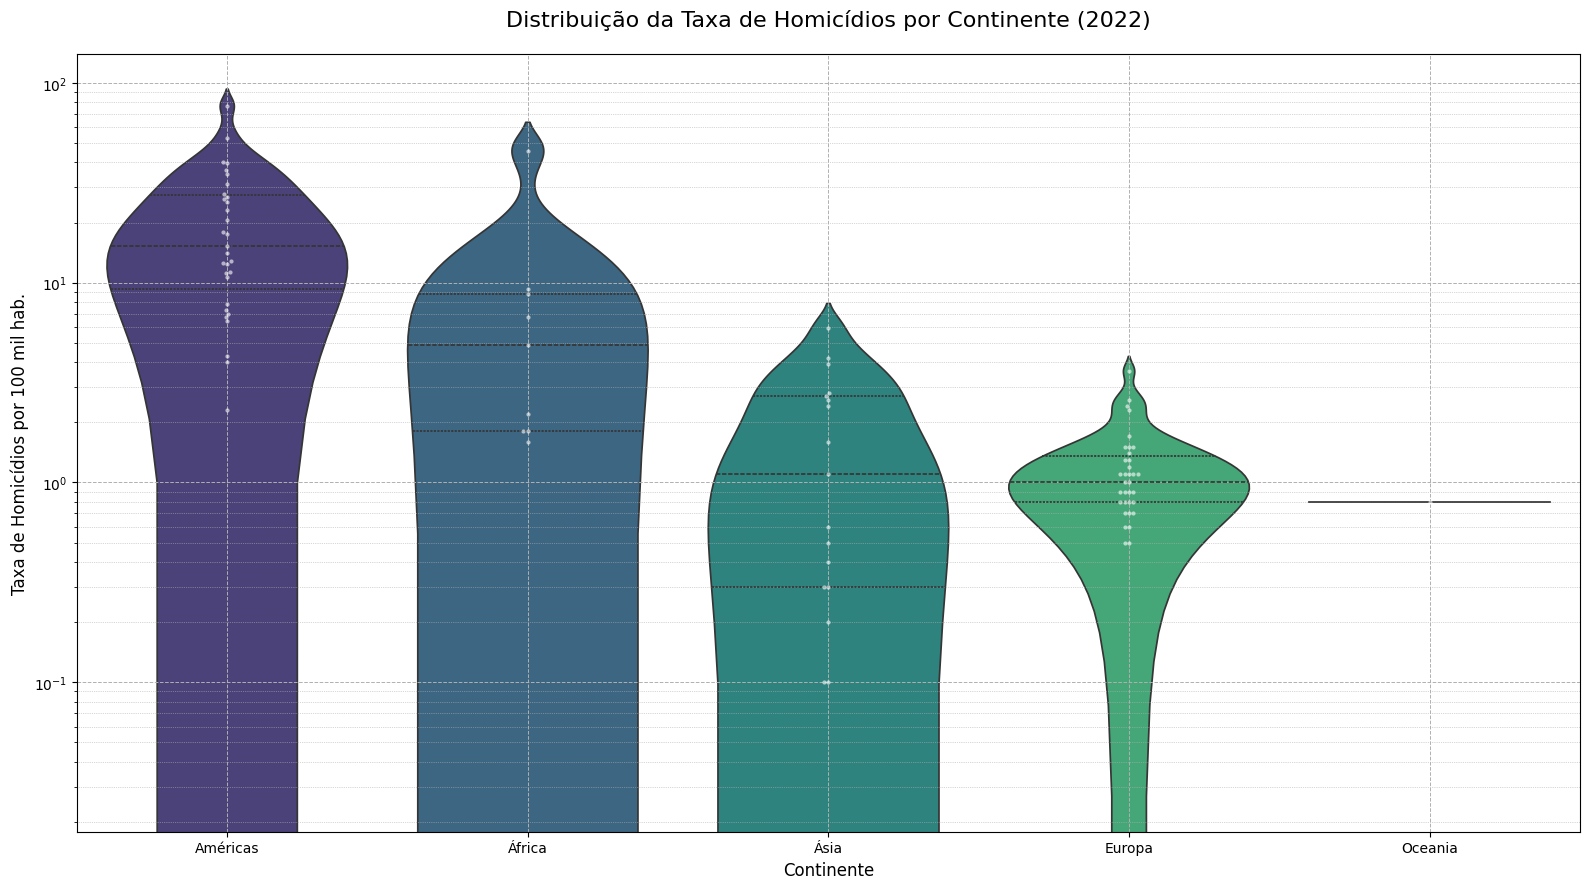

Gerando Visualização 4: Proporção de Vítimas de Homicídio por Gênero...
Gráfico de dispersão interativo salvo em: visualizacoes_crimes_final\4_dispersao_genero_vitimas.html
Gerando Visualização 5: Heatmap de Correlação entre Tipos de Crime...


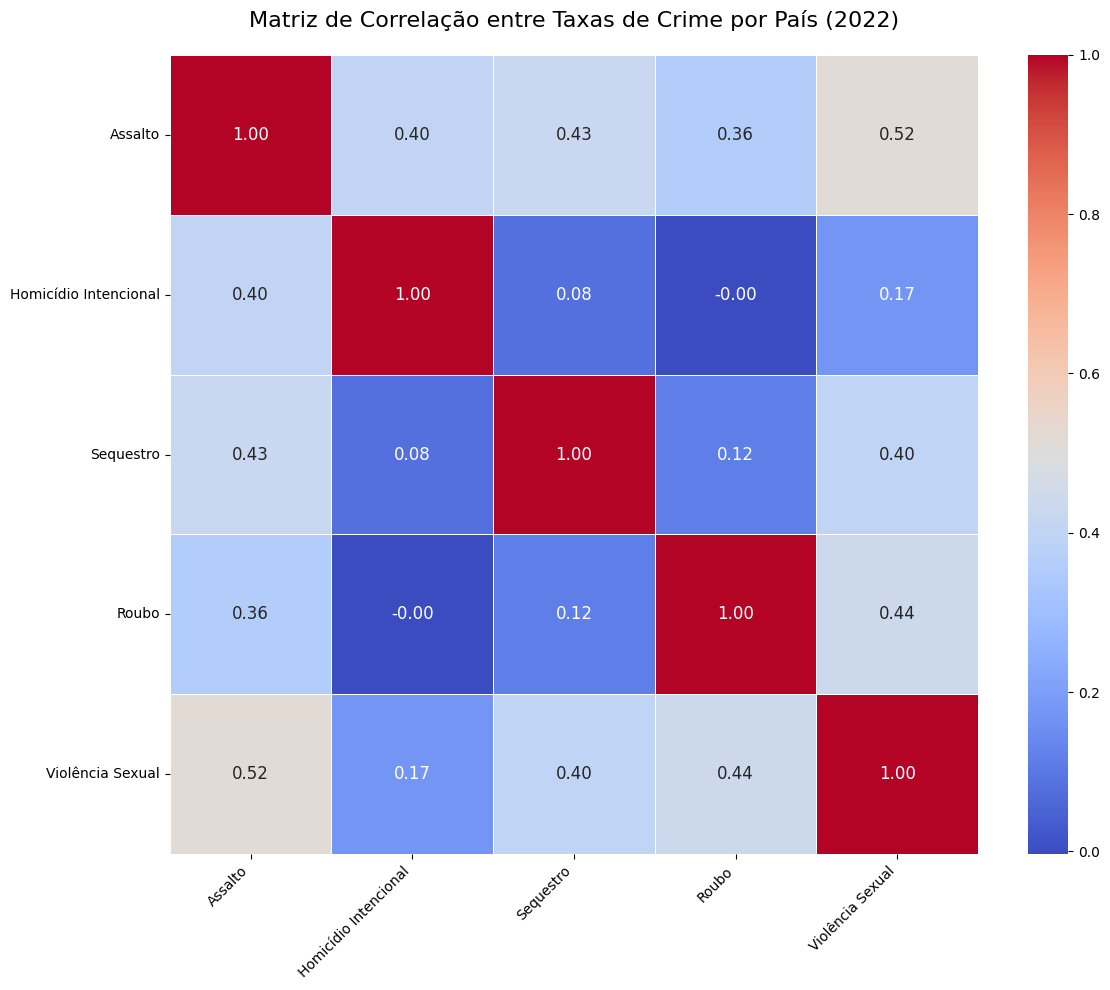


--- Fim da análise. Todas as visualizações foram geradas. ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
import country_converter as cc

# --- 1. CONFIGURAÇÃO E CARGA DOS DADOS ---
# Define o caminho para o arquivo e a pasta de saída
caminho_arquivo_crimes = 'SYB67_328_202411_Intentional homicides and other crimes.csv'
pasta_saida = Path('visualizacoes_crimes_final')
pasta_saida.mkdir(exist_ok=True)

# Carrega e limpa o DataFrame inicial
try:
    # Lê o CSV, especificando o separador e as colunas de interesse
    df_crimes = pd.read_csv(caminho_arquivo_crimes, sep=';', usecols=[0, 1, 2, 3])
    df_crimes.columns = ['Area', 'Year', 'Series', 'Value'] # Renomeação simplificada
    
    # Converte a coluna 'Value' para número, tratando erros
    df_crimes['Value'] = pd.to_numeric(df_crimes['Value'], errors='coerce')
    df_crimes.dropna(subset=['Value'], inplace=True) # Remove linhas sem valor numérico
    print("DataFrame de crimes carregado e limpo com sucesso.")
except FileNotFoundError:
    print(f"Erro: O arquivo '{caminho_arquivo_crimes}' não foi encontrado. Verifique o caminho.")
    exit()
except Exception as e:
    print(f"Erro inesperado durante o carregamento: {e}")
    exit()

# --- 2. DEFINIÇÃO DAS VARIÁVEIS E FILTROS ---
# Nomes exatos das séries para evitar erros de digitação
serie_taxa_homicidios = 'Intentional homicide rates per 100,000'
serie_vitimas_masculinas = 'Percentage of male and female intentional homicide victims, Male'
serie_vitimas_femininas = 'Percentage of male and female intentional homicide victims, Female'
serie_assalto = 'Assault rate per 100,000 population'
serie_roubo = 'Theft at the national level, rate per 100,000 population'
serie_violencia_sexual = 'Total Sexual Violence at the national level, rate per 100,000'
serie_sequestro = 'Kidnapping at the national level, rate per 100,000'

# Encontra o ano mais recente para análises transversais
ano_mais_recente = df_crimes['Year'].max()
print(f"\nAnálise focada no ano mais recente disponível: {ano_mais_recente}")

# --- 3. FUNÇÃO AUXILIAR PARA MAPEAMENTO DE CONTINENTES ---
# Função para converter nomes de países/regiões em continentes usando 'country_converter'
# E traduzir para português.
def get_continent_pt(area_name):
    # Lista de regiões agregadas e entidades não-país que devem ser ignoradas
    agregados_excluir = [
        'Total, all countries or areas', 'World', 'Africa', 'Americas', 'Asia', 'Europe', 'Oceania',
        'Northern Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa',
        'Caribbean', 'Central America', 'South America', 'Northern America', 'Central Asia',
        'Eastern Asia', 'South-eastern Asia', 'Southern Asia', 'Western Asia', 'Eastern Europe',
        'Northern Europe', 'Southern Europe', 'Western Europe', 'Australia and New Zealand',
        'Latin America & the Caribbean', 'Sub-Saharan Africa', 'Least developed countries',
        'LLDCs', 'SIDS', 'State of Palestine'
    ]
    if area_name in agregados_excluir:
        return None

    # Converte o nome da área para o nome do continente em inglês
    continent_en = cc.convert(names=area_name, to='continent', not_found=None)
    
    # Mapeamento para português
    mapa_continentes = {
        'Asia': 'Ásia',
        'Europe': 'Europa',
        'Africa': 'África',
        'North America': 'Américas',
        'South America': 'Américas',
        'America': 'Américas', # O 'cc' às vezes retorna 'America'
        'Oceania': 'Oceania'
    }
    return mapa_continentes.get(continent_en)
    
def get_iso_alpha(area_name):
    """Converte nome da área para código ISO Alpha-3 para uso em mapas."""
    return cc.convert(names=area_name, to='ISO3', not_found=None)


# --- 4. GERAÇÃO DAS VISUALIZAÇÕES ---

# --- VISUALIZAÇÃO 1: Série Temporal (Linha) - Brasil vs. Média Global ---
print("\nGerando Visualização 1: Tendência da Taxa de Homicídios (Brasil vs. Média Global)...")
df_comparacao = df_crimes[
    (df_crimes['Area'].isin(['Brazil', 'Total, all countries or areas'])) &
    (df_crimes['Series'] == serie_taxa_homicidios)
].copy()

if not df_comparacao.empty:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_comparacao, x='Year', y='Value', hue='Area', marker='o', lw=2.5)
    plt.title('Taxa de Homicídios Intencionais (por 100 mil hab.): Brasil vs. Média Global', fontsize=16, pad=20)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel('Taxa de Homicídios', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(sorted(df_comparacao['Year'].unique()))
    plt.legend(title='Localização', frameon=False)
    plt.tight_layout()
    plt.savefig(pasta_saida / '1_tendencia_homicidios_brasil_global.png', dpi=300)
    plt.show()
else:
    print("Dados insuficientes para a Visualização 1.")

# --- Preparação de dados para as próximas visualizações ---
df_recente = df_crimes[df_crimes['Year'] == ano_mais_recente].copy()
df_recente['Continente'] = df_recente['Area'].apply(get_continent_pt)
df_recente_paises = df_recente.dropna(subset=['Continente']).copy()

# --- VISUALIZAÇÃO 2: Visualização Geoespacial (Mapa Coroplético) ---
print("Gerando Visualização 2: Mapa Global da Taxa de Homicídios...")
df_mapa = df_recente_paises[df_recente_paises['Series'] == serie_taxa_homicidios].copy()
df_mapa['iso_alpha'] = df_mapa['Area'].apply(get_iso_alpha)

if not df_mapa.empty:
    fig = px.choropleth(
        df_mapa,
        locations="iso_alpha",
        color="Value",
        hover_name="Area",
        color_continuous_scale=px.colors.sequential.Reds,
        title=f'Mapa Global da Taxa de Homicídios Intencionais por 100 mil habitantes ({ano_mais_recente})',
        labels={'Value': 'Taxa de Homicídios'}
    )
    fig.update_layout(title_x=0.5)
    fig.write_html(pasta_saida / '2_mapa_global_homicidios.html')
    # fig.show() # Descomente para exibir o mapa interativo
    print(f"Mapa interativo salvo em: {pasta_saida / '2_mapa_global_homicidios.html'}")
else:
    print("Dados insuficientes para a Visualização 2 (Mapa).")

# --- VISUALIZAÇÃO 3: Distribuição (Violin Plot) por Continente ---
print("Gerando Visualização 3: Distribuição da Taxa de Homicídios por Continente...")
df_violino = df_recente_paises[df_recente_paises['Series'] == serie_taxa_homicidios]

if not df_violino.empty:
    # Ordena continentes pela mediana da taxa de homicídios
    order = df_violino.groupby('Continente')['Value'].median().sort_values(ascending=False).index
    
    plt.figure(figsize=(16, 9))
    sns.violinplot(data=df_violino, x='Continente', y='Value', order=order, palette='viridis', inner='quartile')
    sns.swarmplot(data=df_violino, x='Continente', y='Value', order=order, color='white', size=3, alpha=0.6) # Adiciona pontos
    plt.title(f'Distribuição da Taxa de Homicídios por Continente ({ano_mais_recente})', fontsize=16, pad=20)
    plt.xlabel('Continente', fontsize=12)
    plt.ylabel('Taxa de Homicídios por 100 mil hab.', fontsize=12)
    plt.yscale('log') # Escala logarítmica para melhor visualização das disparidades
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5)
    plt.grid(True, which='major', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.savefig(pasta_saida / '3_distribuicao_homicidios_continente.png', dpi=300)
    plt.show()
else:
    print("Dados insuficientes para a Visualização 3 (Violin Plot).")
    
# --- VISUALIZAÇÃO 4: Dispersão (Scatter Plot) - Proporção de Vítimas por Gênero ---
print("Gerando Visualização 4: Proporção de Vítimas de Homicídio por Gênero...")
df_genero_pivot = df_recente_paises[
    df_recente_paises['Series'].isin([serie_vitimas_masculinas, serie_vitimas_femininas])
].pivot_table(
    index=['Area', 'Continente'], columns='Series', values='Value'
).reset_index()

# Renomeia colunas para facilitar
df_genero_pivot.rename(columns={
    serie_vitimas_masculinas: 'Perc_Vitimas_Masc',
    serie_vitimas_femininas: 'Perc_Vitimas_Fem'
}, inplace=True)

if not df_genero_pivot.empty:
    fig = px.scatter(
        df_genero_pivot,
        x='Perc_Vitimas_Masc',
        y='Perc_Vitimas_Fem',
        color='Continente',
        hover_name='Area',
        title=f'Proporção de Vítimas de Homicídio por Gênero ({ano_mais_recente})',
        labels={'Perc_Vitimas_Masc': '% de Vítimas Masculinas', 'Perc_Vitimas_Fem': '% de Vítimas Femininas'}
    )
    # Adiciona uma linha de referência onde a soma é 100%
    fig.add_shape(type='line', x0=50, y0=50, x1=100, y1=0, line=dict(color='Gray', width=2, dash='dash'))
    fig.update_layout(title_x=0.5)
    fig.write_html(pasta_saida / '4_dispersao_genero_vitimas.html')
    # fig.show()
    print(f"Gráfico de dispersão interativo salvo em: {pasta_saida / '4_dispersao_genero_vitimas.html'}")
else:
    print("Dados insuficientes para a Visualização 4.")

# --- VISUALIZAÇÃO 5: Visualização Avançada (Heatmap) de Correlação entre Crimes ---
print("Gerando Visualização 5: Heatmap de Correlação entre Tipos de Crime...")
series_correlacao = [
    serie_taxa_homicidios, serie_assalto, serie_roubo,
    serie_violencia_sexual, serie_sequestro
]
df_pivot_crimes = df_recente_paises[
    df_recente_paises['Series'].isin(series_correlacao)
].pivot_table(
    index='Area', columns='Series', values='Value'
)
# Renomeia colunas para o heatmap ficar mais limpo
df_pivot_crimes.columns = ['Assalto', 'Homicídio Intencional', 'Sequestro', 'Roubo', 'Violência Sexual']

correlation_matrix = df_pivot_crimes.corr()

if not correlation_matrix.empty and len(correlation_matrix) > 1:
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        annot_kws={"size": 12}
    )
    plt.title(f'Matriz de Correlação entre Taxas de Crime por País ({ano_mais_recente})', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(pasta_saida / '5_heatmap_correlacao_crimes.png', dpi=300)
    plt.show()
else:
    print("Dados insuficientes para a Visualização 5 (Heatmap).")

print("\n--- Fim da análise. Todas as visualizações foram geradas. ---")

**1. Introdução**

A análise de padrões de criminalidade em escala global é uma tarefa complexa, dada a heterogeneidade das fontes de dados e das realidades socioeconômicas. Este relatório apresenta uma análise visual de indicadores de crimes violentos, com foco em homicídios intencionais, utilizando dados do Anuário Estatístico das Nações Unidas. O objetivo é desconstruir a complexidade do tema através de cinco visualizações de dados distintas, que progressivamente revelam padrões temporais, distribuições geográficas, disparidades regionais e o contexto criminológico do fenômeno.

**2. Análise dos Resultados**

A investigação foi estruturada em etapas lógicas para construir um entendimento coeso a partir dos dados.

**2.1. Tendência Temporal e Anomalia Nacional**
A análise da série temporal (Gráfico de Linha) da taxa de homicídios (2005-2022) indica uma notável estabilidade na média global. Contudo, essa média mascara realidades distintas, como a do Brasil, cuja taxa se manteve cronicamente 4 a 5 vezes superior à mundial, apesar de uma tendência de queda nos anos mais recentes. Isso demonstra que uma análise puramente global é insuficiente.

**2.2. Distribuição Geográfica e Magnitude da Disparidade**
A investigação da distribuição espacial (Mapa Coroplético) revela que as altas taxas de homicídio não são um fenômeno globalmente distribuído, mas sim geograficamente concentrado, com focos de alta incidência na América Latina, Caribe e África Austral. A magnitude dessa disparidade é quantificada pelo Gráfico de Violino, que, utilizando uma escala logarítmica, demonstra que as distribuições de taxas de homicídio da Europa e das Américas representam realidades estatisticamente incomparáveis em uma escala linear, evidenciando um profundo abismo entre as regiões.

**2.3. Contexto da Vitimologia e das Correlações Criminais**
Para contextualizar o fenômeno, analisou-se o perfil da vítima por gênero (Gráfico de Dispersão), que mostra que a vitimização por homicídio é desproporcionalmente masculina em quase todos os países. Adicionalmente, a matriz de correlação (Heatmap) entre diferentes tipos de crime indica que a taxa de homicídio possui uma correlação positiva moderada com a taxa de assalto (r ≈ 0.40), mas uma correlação mais fraca com crimes patrimoniais como o roubo (r ≈ 0).

**3. Discussão e Conclusão**

A síntese dos resultados sugere que a violência letal global, embora estável em sua média, é um fenômeno de extremos. A evidência visual aponta para uma forte concentração geográfica, primariamente na América Latina, onde a disparidade com regiões mais pacíficas, como a Europa, é massiva. O perfil da vítima é predominantemente masculino, e o homicídio parece estar mais associado a um contexto de violência interpessoal (assaltos) do que a crimes contra o patrimônio.

Conclui-se que uma abordagem eficaz para a redução da violência deve ser geograficamente focada e considerar as dinâmicas criminais locais. Ressalta-se que esta análise é limitada pela disponibilidade e pela qualidade variável dos dados reportados pelos países, o que exige cautela na generalização dos achados.